## Final Project Submission

* Please fill out:
* John Paul Hernandez Alcala
* Part Time
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


### Libraries used

In [1]:
#!pip install omdb #if not installed already

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import omdb
import itertools as it
from datetime import datetime, date
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline  

## Bringing in R.O.I. and OMDb Data to Join into One Dataset

First we are going to bring in the movie budget dataframe we obtained from MovieBudgetData.ipynb to join the data obtained from OMDb API in OMDb_Data.ipynb.

In [2]:
%%capture 
%run ./MovieBudgetAnalysis.ipynb #capture output of file ran.

In [3]:
%store -r dfROI
dfROI.head() #retrieve stored variable and output head

,movie,year,Worldwide R.O.I.(%)
0,Avatar,2009,553.257713
1,Pirates of the Caribbean: On Stranger Tides,2011,154.667286
2,Dark Phoenix,2019,-57.210757
3,Avengers: Age of Ultron,2015,324.384139
4,Star Wars Ep. VIII: The Last Jedi,2017,315.369636


In [4]:
dfROI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 3 columns):
movie                  5126 non-null object
year                   5126 non-null object
Worldwide R.O.I.(%)    5126 non-null float64
dtypes: float64(1), object(2)
memory usage: 120.3+ KB


In [5]:
df0 = pd.read_csv('./ReadyOMDbAPIData', index_col=0) #read in data into dataframe

In [6]:
dfOMDb = df0.reset_index(drop=True) #reset index

In [7]:
dfOMDb.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,ratings,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production
0,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",A paraplegic Marine dispatched to the moon Pan...,...,https://m.media-amazon.com/images/M/MV5BMTYwOT...,"[{'source': 'Internet Movie Database', 'value'...",83.0,7.8,"1,086,714",tt0499549,movie,22 Apr 2010,"$749,700,000",20th Century Fox
1,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,...,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'source': 'Internet Movie Database', 'value'...",45.0,6.6,"462,689",tt1298650,movie,18 Oct 2011,"$241,063,875",Walt Disney Pictures
2,Dark Phoenix,2019,PG-13,07 Jun 2019,113 min,"Action, Adventure, Sci-Fi",Simon Kinberg,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...",Jean Grey begins to develop incredible powers ...,...,https://m.media-amazon.com/images/M/MV5BMmZmYT...,"[{'source': 'Internet Movie Database', 'value'...",43.0,5.8,"132,810",tt6565702,movie,03 Sep 2019,NaN,20th Century Fox
3,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,...,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'source': 'Internet Movie Database', 'value'...",66.0,7.3,"704,588",tt2395427,movie,02 Oct 2015,"$429,113,729",Walt Disney Pictures
4,Avengers: Infinity War,2018,PG-13,27 Apr 2018,149 min,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",The Avengers and their allies must be willing ...,...,https://m.media-amazon.com/images/M/MV5BMjMxNj...,"[{'source': 'Internet Movie Database', 'value'...",68.0,8.5,"754,875",tt4154756,movie,14 Aug 2018,"$664,987,816",Walt Disney Pictures


In [8]:
dfOMDb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 23 columns):
title          4380 non-null object
year           4380 non-null object
rated          4187 non-null object
released       4336 non-null object
runtime        4341 non-null object
genre          4372 non-null object
director       4316 non-null object
writer         4253 non-null object
actors         4352 non-null object
plot           4294 non-null object
language       4362 non-null object
country        4376 non-null object
awards         3784 non-null object
poster         4260 non-null object
ratings        4375 non-null object
metascore      3841 non-null float64
imdb_rating    4306 non-null float64
imdb_votes     4306 non-null object
imdb_id        4380 non-null object
type           4380 non-null object
dvd            3829 non-null object
box_office     2298 non-null object
production     3827 non-null object
dtypes: float64(2), object(21)
memory usage: 787.2+ KB


Next, we need to rename the 'movie' column in dfROI to 'title', so we can merge our dataframes.

In [9]:
dfROI = dfROI.rename(columns = {'movie':'title'})

In [10]:
dfROI.keys()

Index(['title', 'year', 'Worldwide R.O.I.(%)'], dtype='object')

In [11]:
dfCombined = dfROI.merge(dfOMDb, how='inner', on=['title', 'year']) #we are going to combine the two dataframes into one.

In [12]:
dfCombined.head()

,title,year,Worldwide R.O.I.(%),rated,released,runtime,genre,director,writer,actors,...,poster,ratings,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production
0,Avatar,2009,553.257713,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",...,https://m.media-amazon.com/images/M/MV5BMTYwOT...,"[{'source': 'Internet Movie Database', 'value'...",83.0,7.8,"1,086,714",tt0499549,movie,22 Apr 2010,"$749,700,000",20th Century Fox
1,Pirates of the Caribbean: On Stranger Tides,2011,154.667286,PG-13,20 May 2011,136 min,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",...,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,"[{'source': 'Internet Movie Database', 'value'...",45.0,6.6,"462,689",tt1298650,movie,18 Oct 2011,"$241,063,875",Walt Disney Pictures
2,Dark Phoenix,2019,-57.210757,PG-13,07 Jun 2019,113 min,"Action, Adventure, Sci-Fi",Simon Kinberg,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...",...,https://m.media-amazon.com/images/M/MV5BMmZmYT...,"[{'source': 'Internet Movie Database', 'value'...",43.0,5.8,"132,810",tt6565702,movie,03 Sep 2019,NaN,20th Century Fox
3,Avengers: Age of Ultron,2015,324.384139,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",...,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'source': 'Internet Movie Database', 'value'...",66.0,7.3,"704,588",tt2395427,movie,02 Oct 2015,"$429,113,729",Walt Disney Pictures
4,Avengers: Infinity War,2018,582.711400,PG-13,27 Apr 2018,149 min,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",...,https://m.media-amazon.com/images/M/MV5BMjMxNj...,"[{'source': 'Internet Movie Database', 'value'...",68.0,8.5,"754,875",tt4154756,movie,14 Aug 2018,"$664,987,816",Walt Disney Pictures


In [13]:
dfCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4367 entries, 0 to 4366
Data columns (total 24 columns):
title                  4367 non-null object
year                   4367 non-null object
Worldwide R.O.I.(%)    4367 non-null float64
rated                  4185 non-null object
released               4326 non-null object
runtime                4335 non-null object
genre                  4359 non-null object
director               4316 non-null object
writer                 4251 non-null object
actors                 4340 non-null object
plot                   4283 non-null object
language               4351 non-null object
country                4363 non-null object
awards                 3780 non-null object
poster                 4252 non-null object
ratings                4366 non-null object
metascore              3841 non-null float64
imdb_rating            4297 non-null float64
imdb_votes             4297 non-null object
imdb_id                4367 non-null object
type      

We notice that the 'title' object number above, 4367, does not match the 'title' object number, 3480. Let's check out what those are, and if we should include them.

In [42]:
dfOMDb[~dfOMDb.title.isin(dfCombined.title)]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,ratings,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production
692,Agora,2010–,NaN,21 Sep 2010,NaN,Game-Show,NaN,NaN,"Fátima Lopes, Cristina Areia, Helga Brandão, A...",NaN,...,NaN,NaN,NaN,NaN,NaN,tt1781967,series,NaN,NaN,NaN
3048,Quartet,2013–,NaN,01 Oct 2013,NaN,"Animation, Action, Fantasy",NaN,NaN,"Saki Fujita, Misato Fukuen, Yûki Kaji, Miyuki ...",There is a town where humans and demons co-exi...,...,https://m.media-amazon.com/images/M/MV5BOTY3OW...,"[{'source': 'Internet Movie Database', 'value'...",NaN,7.3,47,tt3169640,series,NaN,NaN,NaN
3211,The Joneses,2010–2011,NaN,14 Oct 2010,23 min,Reality-TV,NaN,NaN,"James Blundell, Beau Jones",Australian reality TV series that follows the ...,...,https://m.media-amazon.com/images/M/MV5BNDlkM2...,"[{'source': 'Internet Movie Database', 'value'...",NaN,8.5,43,tt2367359,series,NaN,NaN,NaN
3229,High School,2012–2014,TV-14,11 May 2012,42 min,"Action, Romance, Sci-Fi",NaN,NaN,"Josh Blaylock, Ellary Porterfield, Johanna Bra...",In a futuristic world where gaming is the top ...,...,https://m.media-amazon.com/images/M/MV5BOTgxOT...,"[{'source': 'Internet Movie Database', 'value'...",NaN,7.6,"12,424",tt2170584,series,NaN,NaN,NaN
3671,Green Room,2016–,NaN,20 Apr 2016,NaN,Comedy,NaN,NaN,"Kevin Michael Shiley, Danielle Montezinos, And...","Friends, colleagues and weed come together in ...",...,https://m.media-amazon.com/images/M/MV5BZWI2MW...,"[{'source': 'Internet Movie Database', 'value'...",NaN,2.2,9,tt4950016,series,NaN,NaN,NaN
3720,The Lobster,2016–,NaN,NaN,NaN,Comedy,NaN,NaN,"Andrew Joseph Pahlke, Jeff Woodward, Sarah Gibson",NaN,...,NaN,NaN,NaN,NaN,NaN,tt5438322,series,NaN,NaN,NaN
3834,The Bronze,2016–,NaN,24 Jun 2017,60 min,"Crime, Drama, Horror, Mystery, Thriller",NaN,NaN,"Joaquín Furriel, Norma Aleandro, Daniel Fanego...",A new history created by the bestseller author...,...,https://m.media-amazon.com/images/M/MV5BMDFjMj...,"[{'source': 'Internet Movie Database', 'value'...",NaN,8.0,937,tt7048386,series,NaN,NaN,NaN
4023,Get Real,1999–2000,TV-14,08 Sep 1999,60 min,"Comedy, Drama, Romance",NaN,Clyde Phillips,"Jon Tenney, Debrah Farentino, Eric Christian O...",Follow the dysfunctional Green family as the p...,...,https://m.media-amazon.com/images/M/MV5BNGQwNj...,"[{'source': 'Internet Movie Database', 'value'...",NaN,7.1,491,tt0212662,series,NaN,NaN,NaN
4081,Cabin Fever,2003–,NaN,01 Jun 2003,NaN,Reality-TV,NaN,NaN,NaN,"Cabin Fever. Take one tall ship, ten contestan...",...,NaN,"[{'source': 'Internet Movie Database', 'value'...",NaN,3.0,13,tt0498879,series,NaN,NaN,NaN
4177,Palo Alto,2014–2017,NaN,15 Sep 2014,10 min,"Comedy, Drama",NaN,NaN,"Leonardo Amato, Daniela Suran, Edoardo Soldati...",The stories are about teenagers and their expe...,...,https://m.media-amazon.com/images/M/MV5BOWJlMz...,"[{'source': 'Internet Movie Database', 'value'...",NaN,8.1,23,tt3400342,series,NaN,NaN,NaN


When we look at the 'type' column, we notice all those missing are series, so we can exclude them since we are focusing on movies.

### Genre Analysis

First, let's take a look at the genres of our data.

We need to make sure there are not no null values in our data for the genre column

In [43]:
dfGenre = dfCombined[~dfCombined.genre.isnull()]

In [44]:
dfGenre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4359 entries, 0 to 4366
Data columns (total 24 columns):
title                  4359 non-null object
year                   4359 non-null object
Worldwide R.O.I.(%)    4359 non-null float64
rated                  4184 non-null object
released               4319 non-null object
runtime                4329 non-null object
genre                  4359 non-null object
director               4311 non-null object
writer                 4248 non-null object
actors                 4335 non-null object
plot                   4278 non-null object
language               4346 non-null object
country                4357 non-null object
awards                 3780 non-null object
poster                 4250 non-null object
ratings                4359 non-null object
metascore              3841 non-null float64
imdb_rating            4294 non-null float64
imdb_votes             4294 non-null object
imdb_id                4359 non-null object
type      

From above we can see the number of Worldwide R.O.I.(%) values equals that of genres. Now we can see how many movies are classified with certain genres.

NOTE: we must first consider the Worldwide R.O.I. for the genre set we are going to analyize:

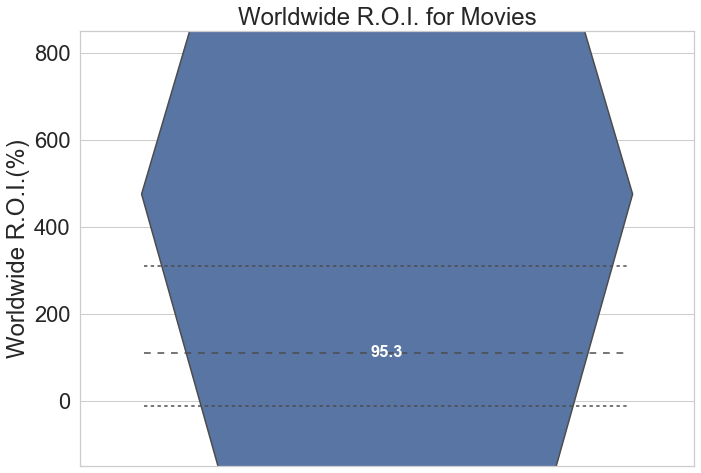

In [207]:
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize = (11,8))
plt.axes(ylim=[-150, 850])#pre set for better appearance

#fliers are also outliers of data
ax = sns.violinplot(x='Worldwide R.O.I.(%)', data=dfGenre, showfliers=True, orient='v', inner='quartile', bw=0.2)

#This finds the median of the data and labels it in white on the boxplot[]
median = round(df['Worldwide R.O.I.(%)'].median(),1) #rounds to the nearest first decimal place
xtick = ax.get_xticks() #gets tick location
vertical_offset = median * 0.05 #offsets slightly off of the median line
ax.text(xtick, median + vertical_offset, median, horizontalalignment='center', size='x-small',color='w',weight='semibold')

ax.set_title('Worldwide R.O.I. for Movies')

plt.show()


We should keep in mind that we are looking for a genre that gives us around the median value of 95.3% or up to the thrid quartile or ~350%.

Each movie title has either an individual or multiple genres associated with it. Therefore, we will only look at the top 40 genre combinations.

In [46]:
genres40 = dfGenre.genre.value_counts().head(40)#This looks at the frequencies of the top 40 genres in the data
genres40

Comedy, Drama, Romance                           178
Comedy                                           159
Drama                                            149
Comedy, Drama                                    146
Comedy, Romance                                  142
Drama, Romance                                   107
Action, Adventure, Sci-Fi                         68
Horror, Mystery, Thriller                         65
Crime, Drama, Thriller                            63
Action, Crime, Drama, Thriller                    60
Horror, Thriller                                  59
Action, Crime, Thriller                           59
Crime, Drama, Mystery, Thriller                   58
Documentary                                       52
Action, Adventure, Thriller                       51
Drama, Thriller                                   43
Comedy, Crime                                     43
Action, Adventure, Sci-Fi, Thriller               42
Crime, Drama                                  

In [19]:
genrelist = list(genres40.keys())#converts the top 40 genres to a list
genrelist

['Comedy, Drama, Romance',
 'Comedy',
 'Drama',
 'Comedy, Drama',
 'Comedy, Romance',
 'Drama, Romance',
 'Action, Adventure, Sci-Fi',
 'Horror, Mystery, Thriller',
 'Crime, Drama, Thriller',
 'Action, Crime, Drama, Thriller',
 'Horror, Thriller',
 'Action, Crime, Thriller',
 'Crime, Drama, Mystery, Thriller',
 'Documentary',
 'Action, Adventure, Thriller',
 'Drama, Thriller',
 'Comedy, Crime',
 'Action, Adventure, Sci-Fi, Thriller',
 'Crime, Drama',
 'Horror',
 'Animation, Adventure, Comedy, Family, Fantasy',
 'Action, Thriller',
 'Biography, Drama',
 'Documentary, Short',
 'Biography, Drama, History',
 'Biography, Drama, Sport',
 'Action, Adventure, Fantasy',
 'Action, Comedy, Crime',
 'Action, Drama, Thriller',
 'Drama, Mystery, Thriller',
 'Action, Comedy, Crime, Thriller',
 'Drama, Music, Romance',
 'Drama, Sport',
 'Action, Sci-Fi, Thriller',
 'Action, Sci-Fi',
 'Comedy, Family',
 'Comedy, Crime, Drama',
 'Animation, Adventure, Comedy, Family',
 'Horror, Mystery',
 'Drama, Music'

We plot these top 40 genre combinations to see which have the most number of movies.

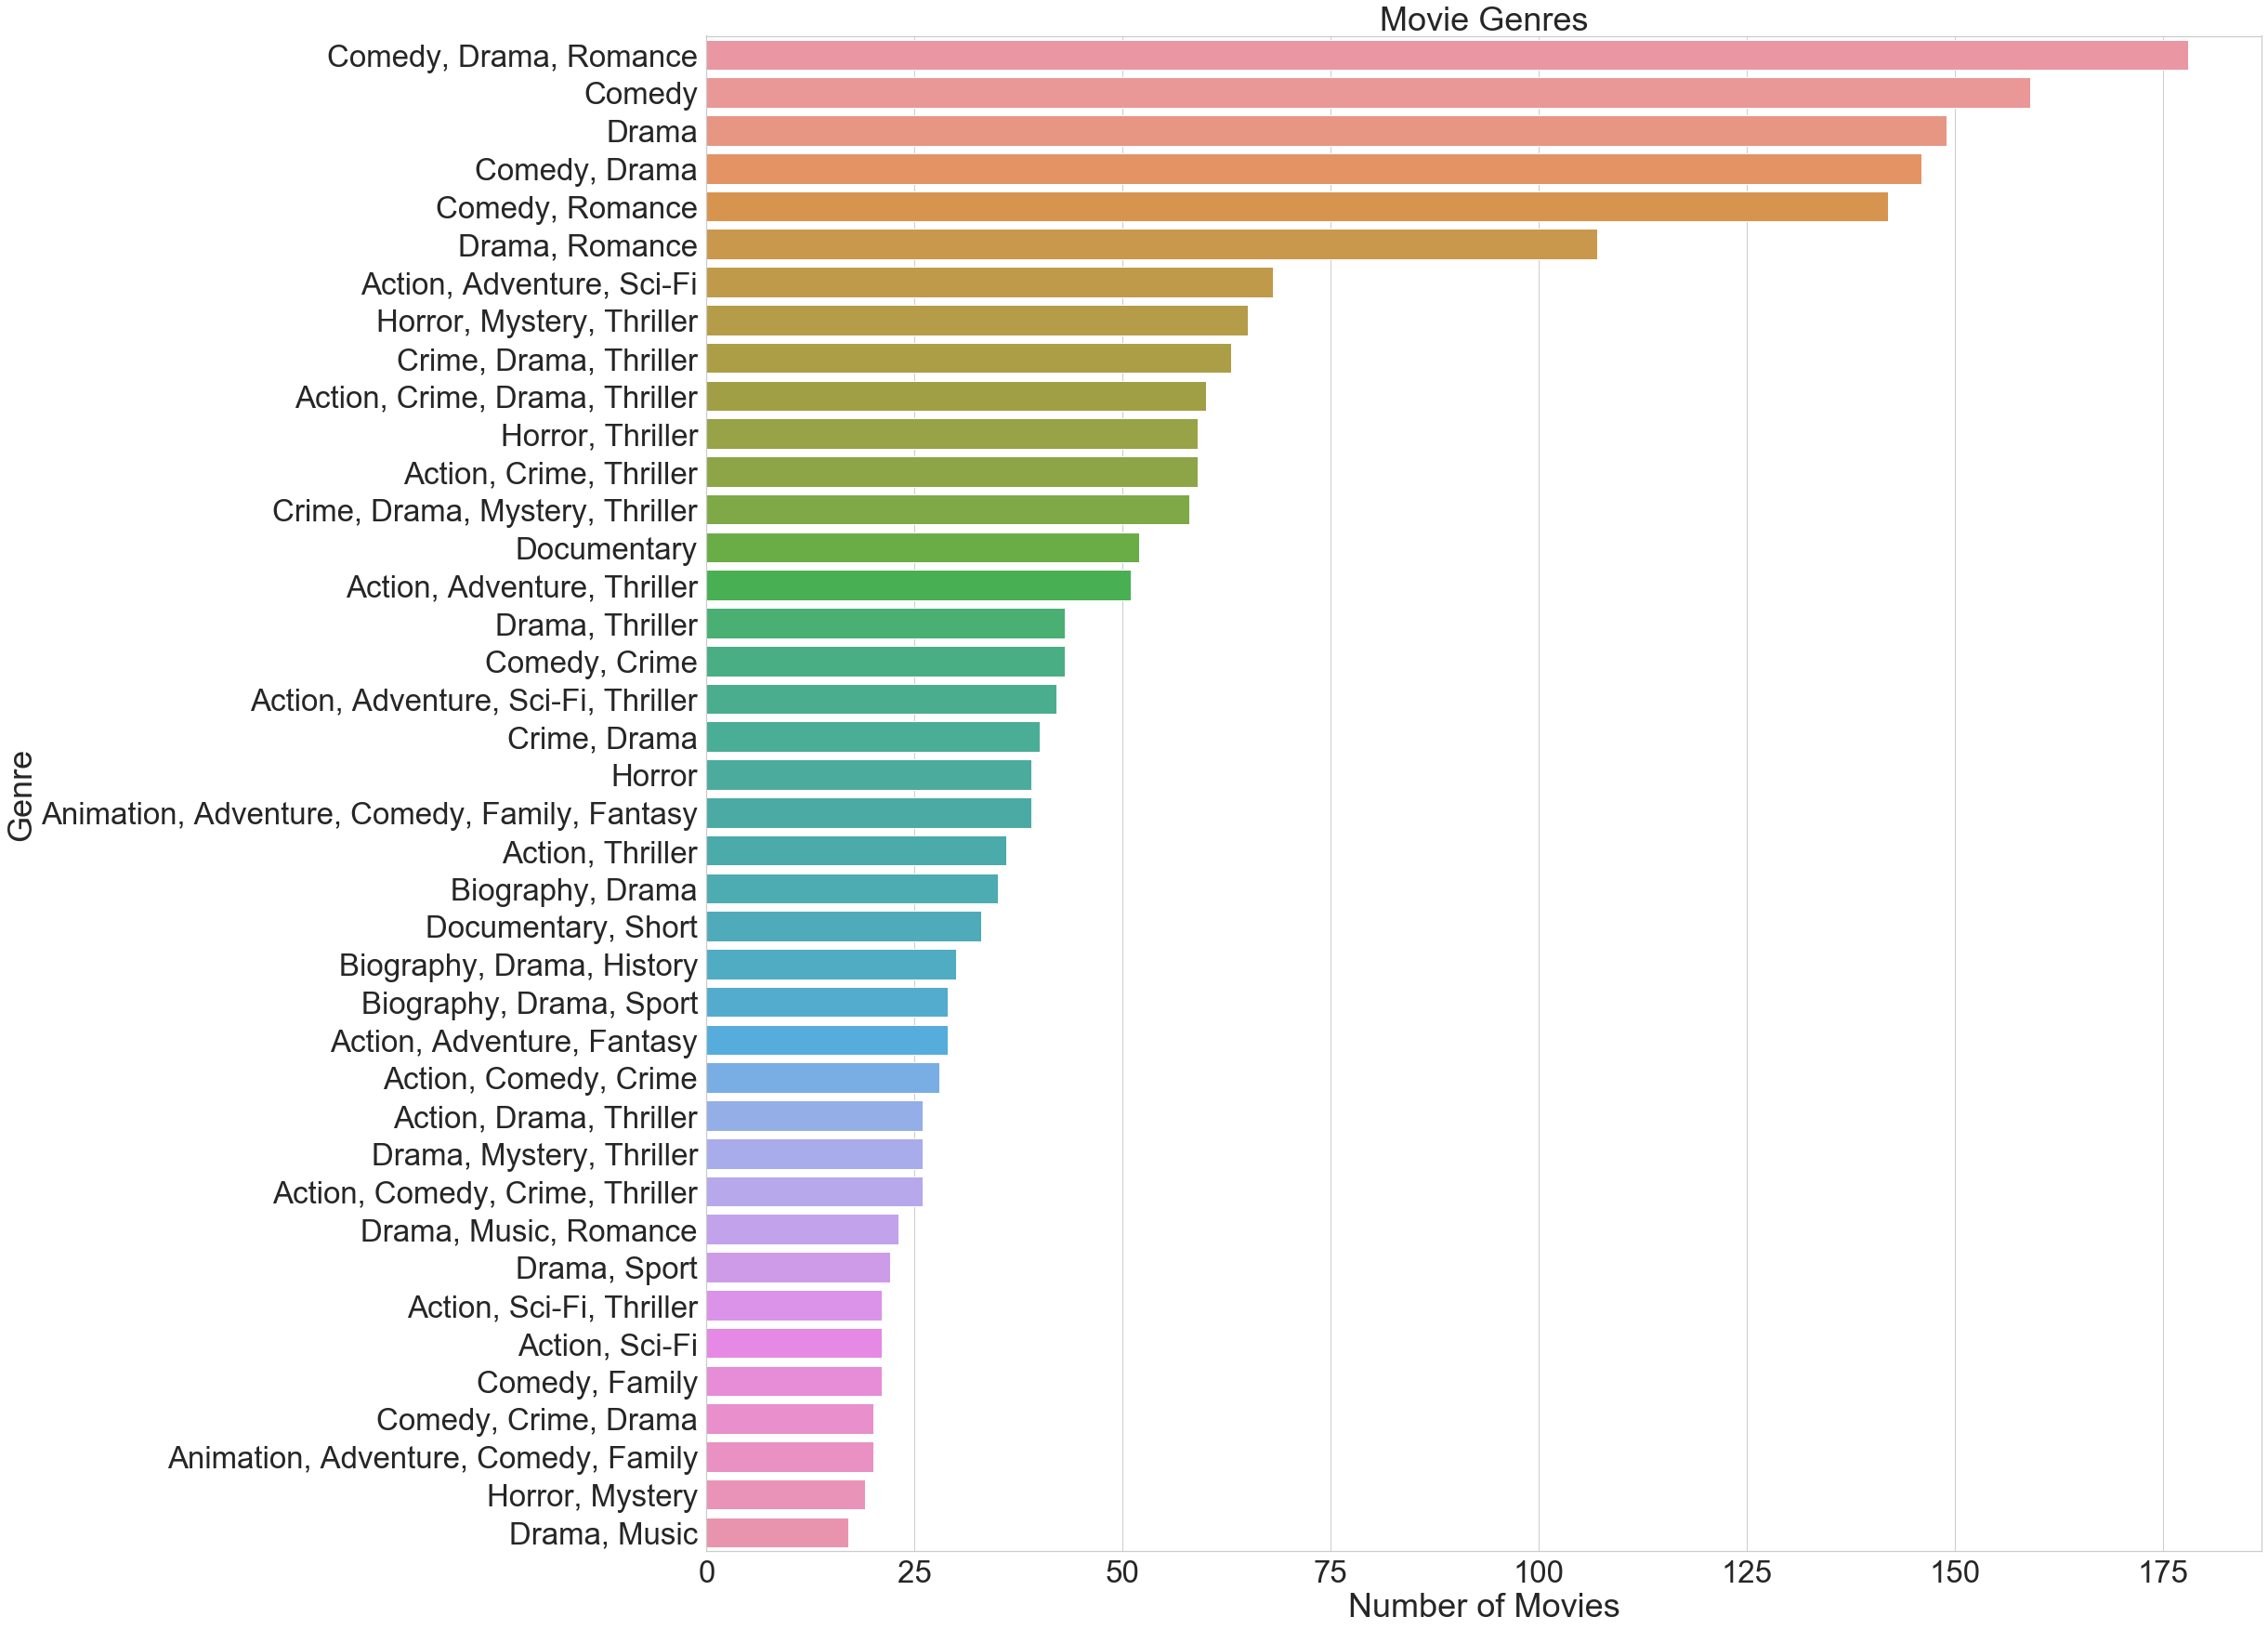

In [20]:
sns.set(style="whitegrid", font_scale=3)
fig = plt.figure(figsize = (30,30))
ax = sns.countplot(y='genre', data=dfGenre, order=genrelist) #order= organizes your data by a given list
ax.set_title('Movie Genres')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.show()

With these top 40 genres, we also look at their R.O.I.'s

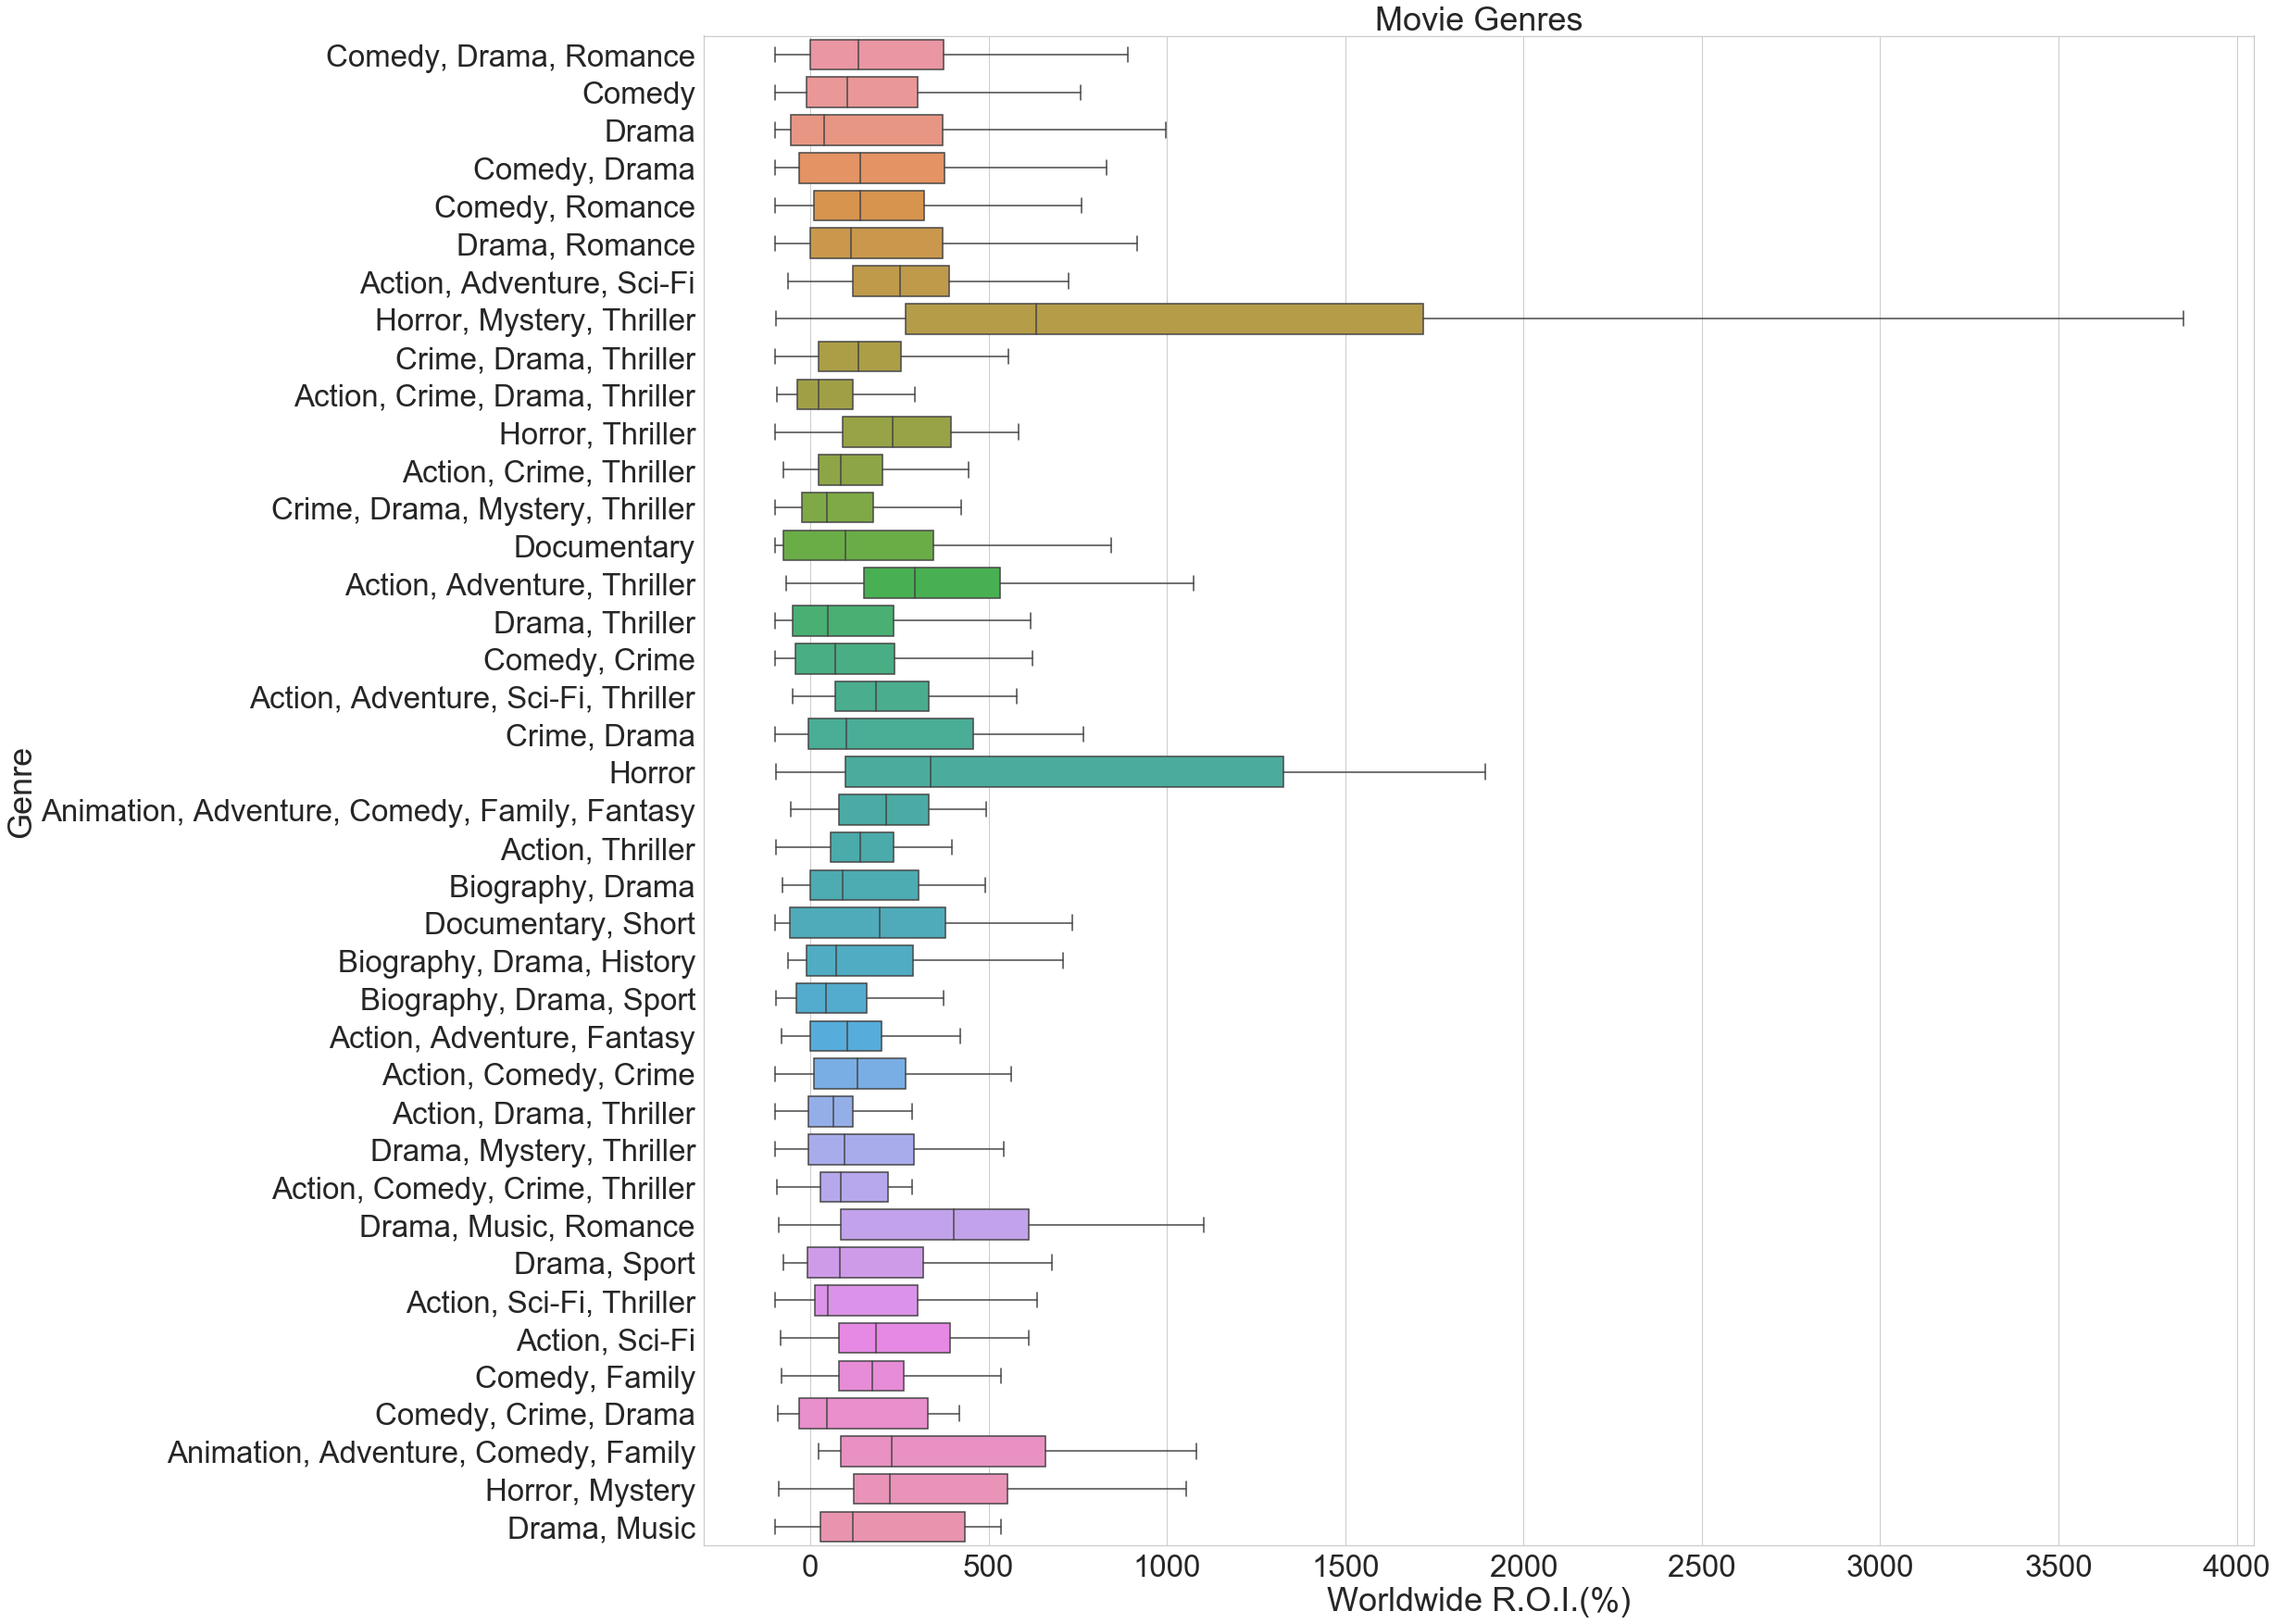

In [21]:
sns.set(style="whitegrid", font_scale=3)
fig = plt.figure(figsize = (30,30))
ax = sns.boxplot(y='genre', x='Worldwide R.O.I.(%)', data=dfGenre, fliersize=10
            , showfliers=False, order=genrelist) #order= organizes your data by a given list
ax.set_title('Movie Genres')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Worldwide R.O.I.(%)')
plt.ylabel('Genre')

plt.show()

In the boxplot below, we limit the R.O.I. range to (-100, 800) since we need to keep in mind the aforementioned R.O.I. of 95.3%.

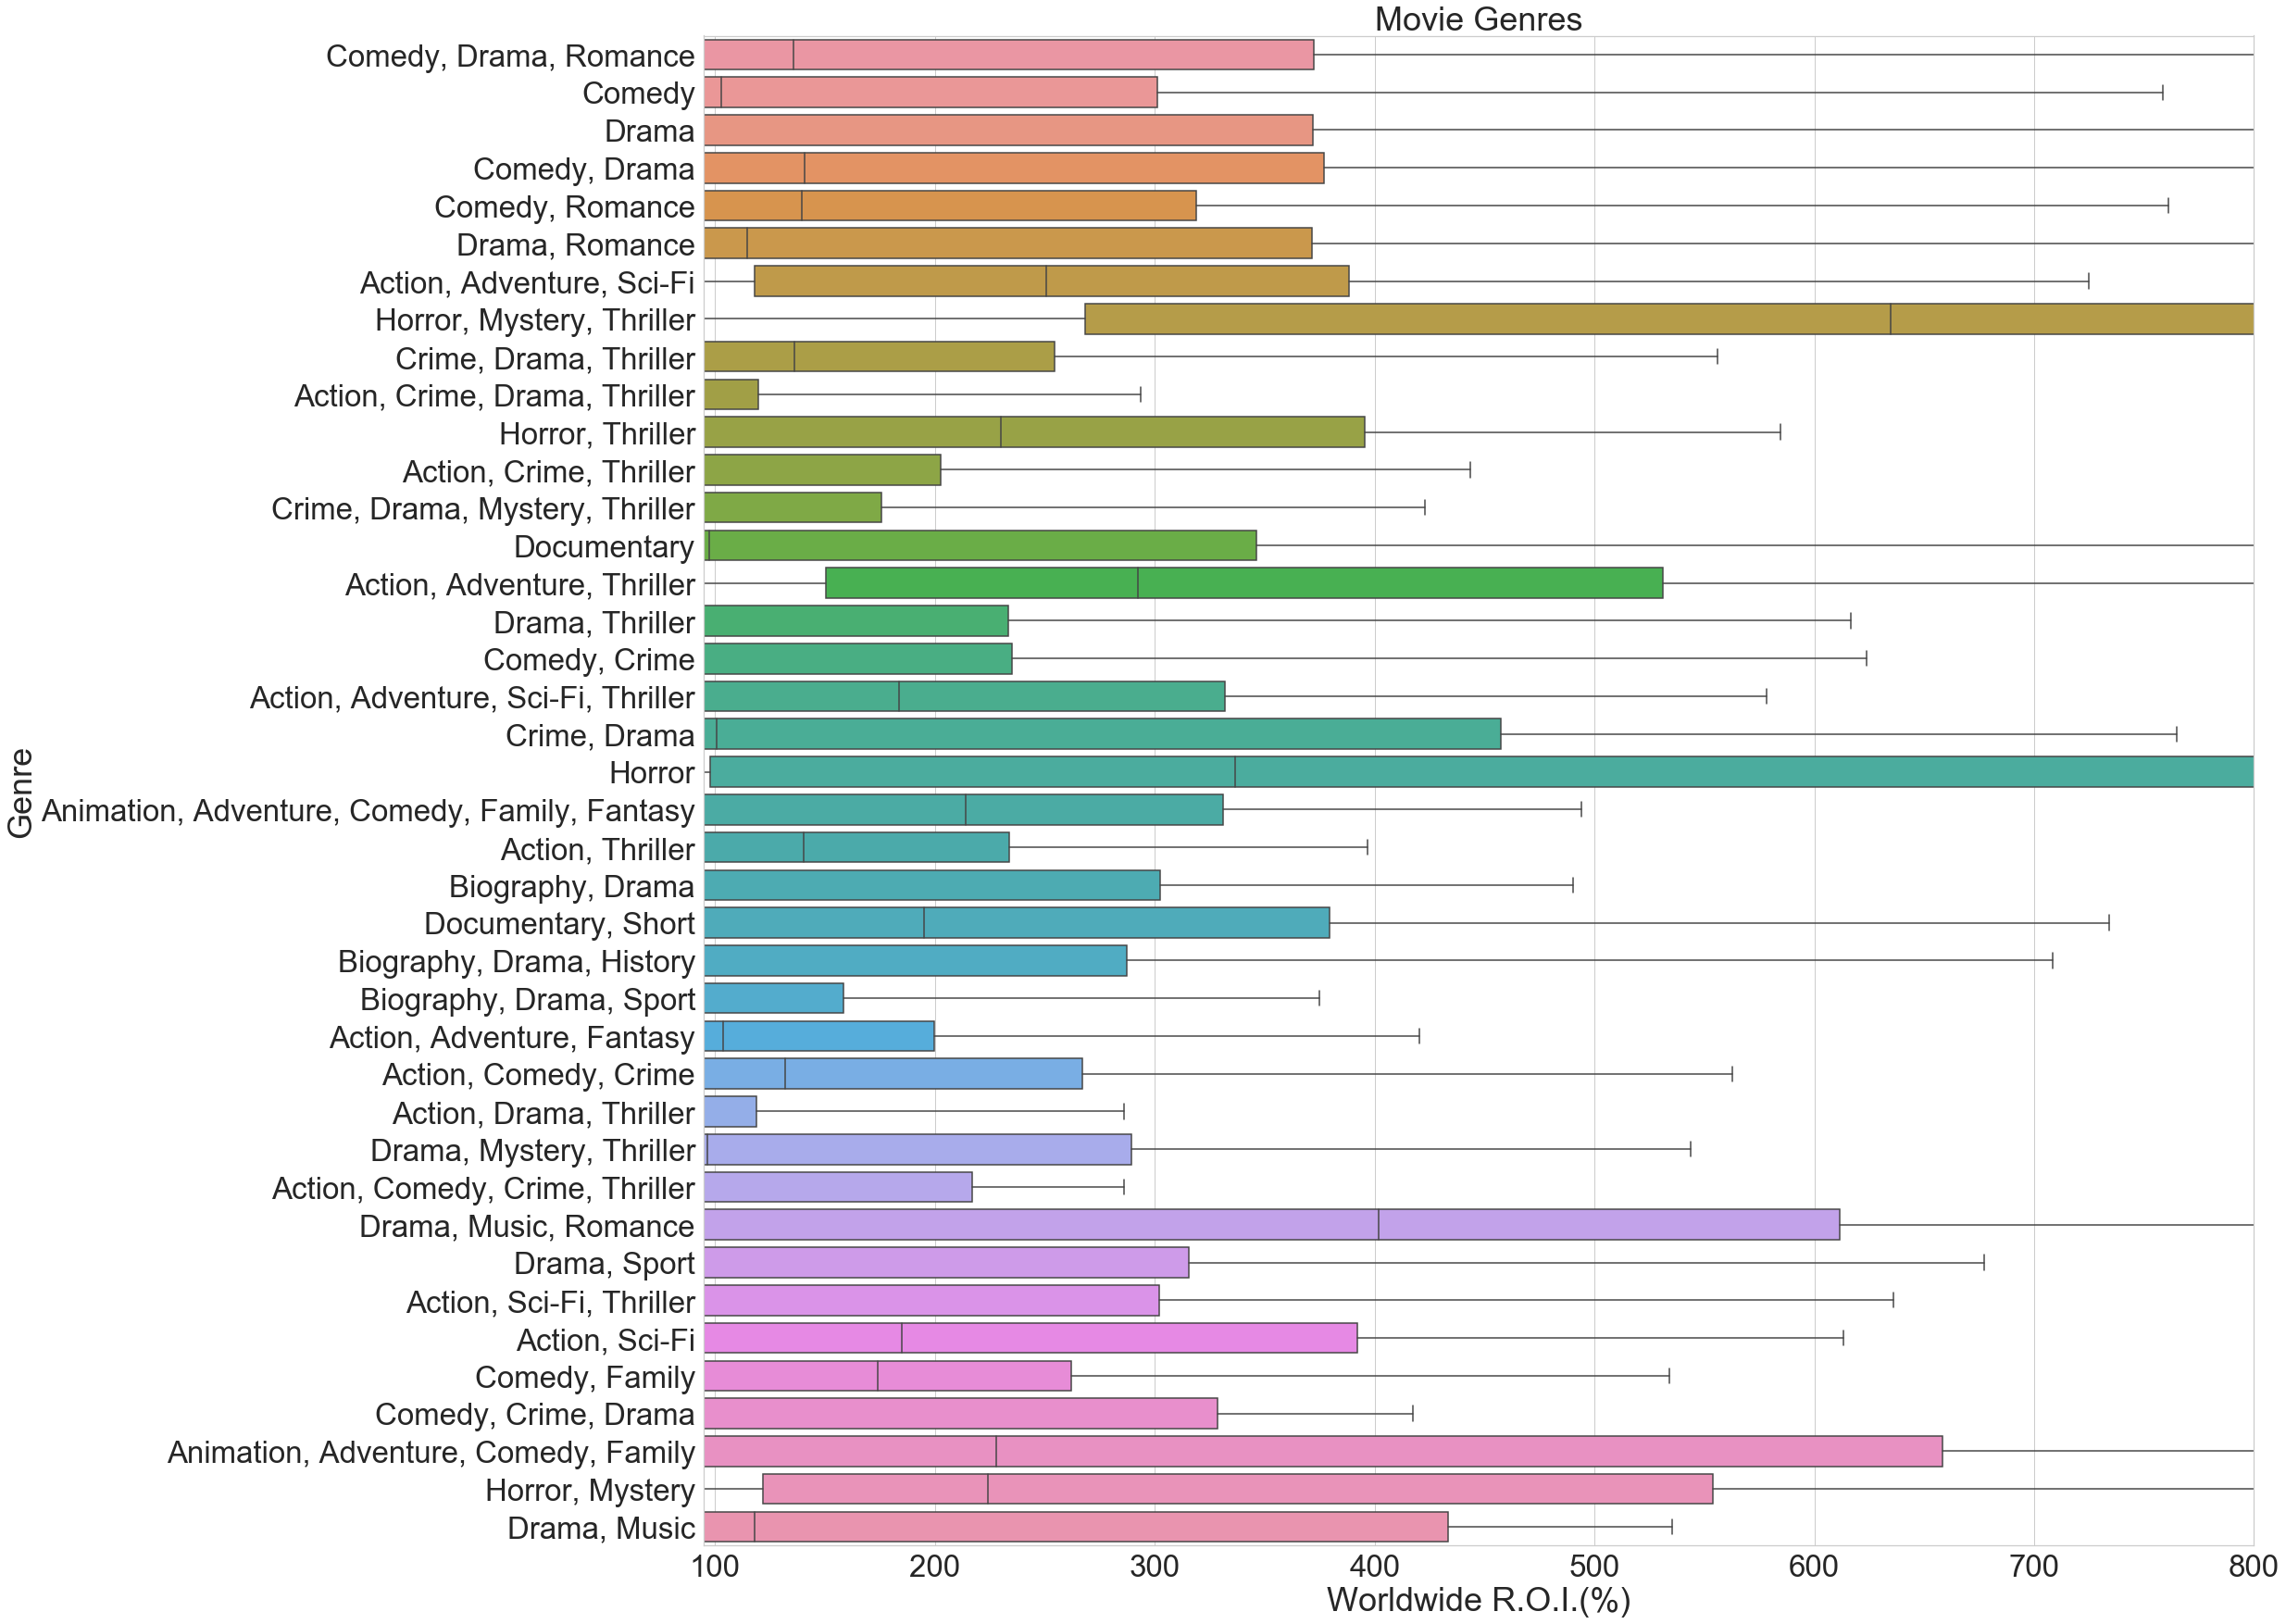

In [208]:
sns.set(style="whitegrid", font_scale=3)
fig = plt.figure(figsize = (30,30))
ax = sns.boxplot(y='genre', x='Worldwide R.O.I.(%)', data=dfGenre, fliersize=10
            , showfliers=False, order=genrelist) #order= organizes your data by a given list
ax.set_title('Movie Genres')
ax.set_xlim(95, 800)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Worldwide R.O.I.(%)')
plt.ylabel('Genre')

plt.show()

From the above boxplot, we notice that movies do not appear to be constrained to only 1. Another observation is that there are a lot of repeated genres. The common genres that have 50% of the movies above 95.3% R.O.I. are Horror, Action, Adventure, and Thriller.

Next we will take a look at Maturity Rating.

### Maturity Rating Analysis

Let's look at our combined data again.

In [24]:
dfCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4367 entries, 0 to 4366
Data columns (total 24 columns):
title                  4367 non-null object
year                   4367 non-null object
Worldwide R.O.I.(%)    4367 non-null float64
rated                  4185 non-null object
released               4326 non-null object
runtime                4335 non-null object
genre                  4359 non-null object
director               4316 non-null object
writer                 4251 non-null object
actors                 4340 non-null object
plot                   4283 non-null object
language               4351 non-null object
country                4363 non-null object
awards                 3780 non-null object
poster                 4252 non-null object
ratings                4366 non-null object
metascore              3841 non-null float64
imdb_rating            4297 non-null float64
imdb_votes             4297 non-null object
imdb_id                4367 non-null object
type      

We notice that 'rated' has 4185 objects and 'Worldwide R.O.I.(%)' has 4367 float64, so these need to match before we plot. Let's find any null values.

In [27]:
dfRated = dfCombined[~dfCombined.rated.isnull()]

In [28]:
dfRated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 0 to 4366
Data columns (total 24 columns):
title                  4185 non-null object
year                   4185 non-null object
Worldwide R.O.I.(%)    4185 non-null float64
rated                  4185 non-null object
released               4180 non-null object
runtime                4182 non-null object
genre                  4184 non-null object
director               4178 non-null object
writer                 4157 non-null object
actors                 4183 non-null object
plot                   4181 non-null object
language               4178 non-null object
country                4184 non-null object
awards                 3757 non-null object
poster                 4176 non-null object
ratings                4185 non-null object
metascore              3838 non-null float64
imdb_rating            4180 non-null float64
imdb_votes             4180 non-null object
imdb_id                4185 non-null object
type      

Now we see that the 'rated' and 'Worldwide R.O.I.(%)' match. Let's take a quick look at what ratings the movies have.

In [73]:
mrating = dfRated.rated.value_counts().head(40)#This looks at the frequencies of the top 40 genres in the data
mrating

R            1766
PG-13        1429
PG            677
Not Rated     130
G             118
Approved       22
Passed         21
NC-17           5
X               4
GP              3
TV-PG           3
TV-14           2
M               2
M/PG            1
TV-MA           1
PASSED          1
Name: rated, dtype: int64

We see that there are ratings that could fit into 'Not Rated', so let's makes those movies go into that category.

In [61]:
dfRated[dfRated.rated == 'Unrated'].rated #This reveals at which index a movie is rated 'Not Rated'

968     Unrated
2577    Unrated
3602    Unrated
3700    Unrated
3782    Unrated
3902    Unrated
4061    Unrated
4068    Unrated
4077    Unrated
4098    Unrated
4241    Unrated
4261    Unrated
4285    Unrated
4328    Unrated
4345    Unrated
4356    Unrated
Name: rated, dtype: object

In [62]:
list1 = list(dfRated[dfRated.rated == 'Unrated'].rated.keys()) #makes a list of the index values

In [63]:
dfnewupdate = pd.DataFrame({'rated':'Not Rated' }, index=list1) #makes new df for updating our current dataframe

In [64]:
dfRated.update(dfnewupdate) #update dataframe

C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [66]:
list1 = list(dfRated[dfRated.rated == 'UNRATED'].rated.keys()) #makes a list of the index values

In [67]:
dfnewupdate = pd.DataFrame({'rated':'Not Rated' }, index=list1)

In [68]:
dfRated.update(dfnewupdate)

In [70]:
list1 = list(dfRated[dfRated.rated == 'NOT RATED'].rated.keys()) #makes a list of the index values

In [71]:
dfnewupdate = pd.DataFrame({'rated':'Not Rated' }, index=list1)

In [72]:
dfRated.update(dfnewupdate)

In [74]:
mrating #checks to see if everything worked.

R            1766
PG-13        1429
PG            677
Not Rated     130
G             118
Approved       22
Passed         21
NC-17           5
X               4
GP              3
TV-PG           3
TV-14           2
M               2
M/PG            1
TV-MA           1
PASSED          1
Name: rated, dtype: int64

Let's plot to see how many movies have certain ratings and how much R.O.I. each rating has.

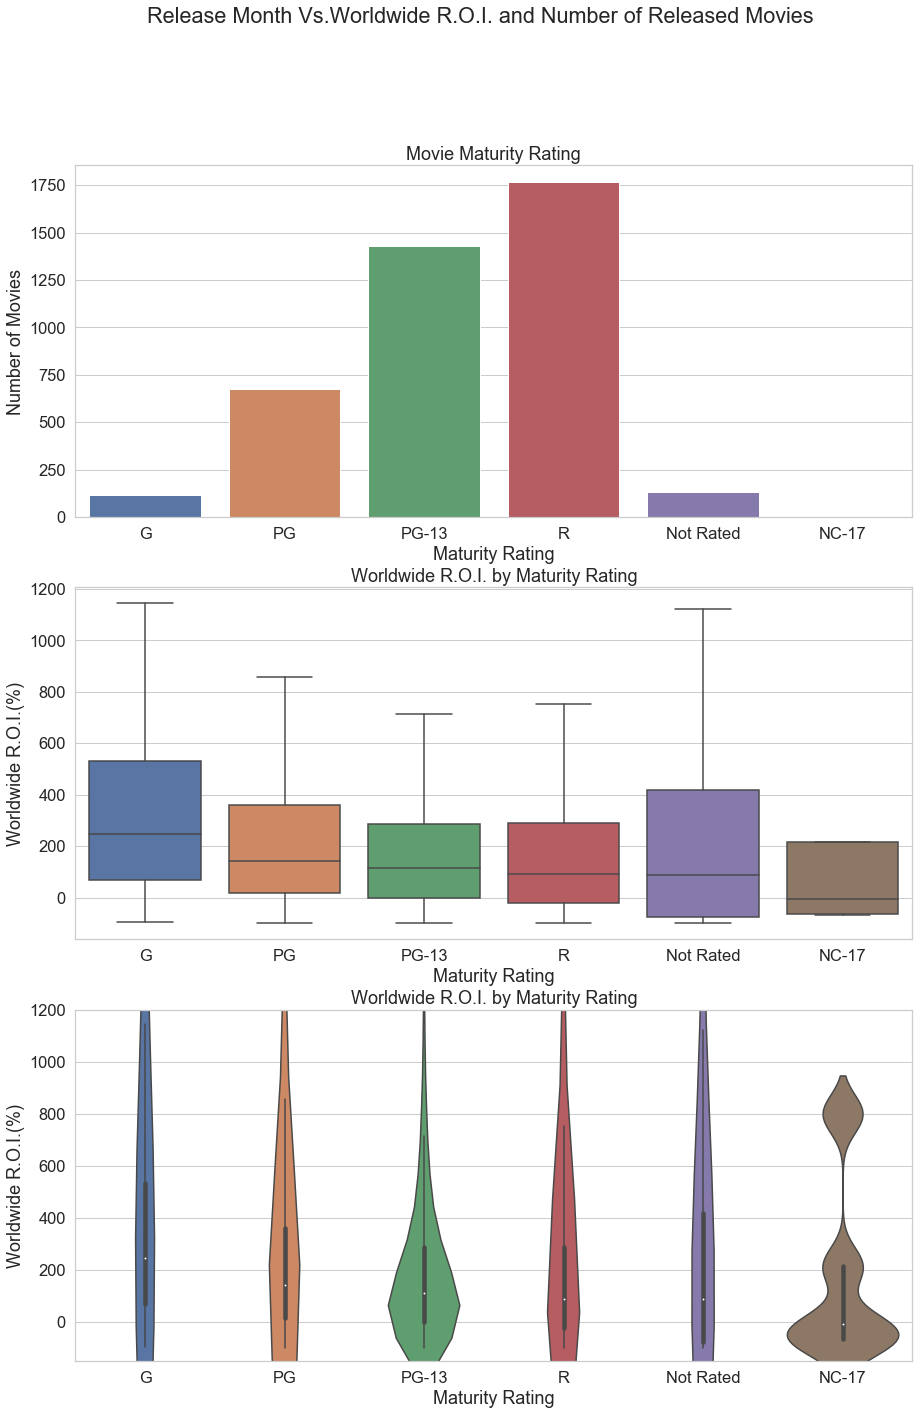

In [183]:
sns.set(style="whitegrid", font_scale=1.5)
fig, axes = plt.subplots(3,1, figsize = (15, 22))
fig.suptitle('Release Month Vs.Worldwide R.O.I. and Number of Released Movies')

ax0 = axes[0]
#ax0.set_ylim(0, 550)
ax0.set_title('Movie Maturity Rating')
sns.countplot(x='rated', data=dfRated, order=['G', 'PG', 'PG-13', 'R', 'Not Rated', 'NC-17'], ax=ax0)
ax0.set_ylabel('Number of Movies')
ax0.set_xlabel('Maturity Rating')
#ax0.set_xticklabels(ax.get_xticklabels(), rotation=90)


ax1 = axes[1]
#ax1.set_ylim(-150, 1200)
ax1.set_title('Worldwide R.O.I. by Maturity Rating')

sns.boxplot(x='rated', y='Worldwide R.O.I.(%)', data=dfRated, fliersize=10
            , showfliers=False, order=['G', 'PG', 'PG-13', 'R', 'Not Rated', 'NC-17'], ax=ax1)
ax1.set_xlabel('Maturity Rating')
#ax1.set_xticklabels(ax.get_xticklabels(), rotation=90)


ax2 = axes[2]
ax2.set_ylim(-150, 1200)
ax2.set_title('Worldwide R.O.I. by Maturity Rating')

sns.violinplot(x='rated', y='Worldwide R.O.I.(%)', data=dfRated, fliersize=10
            , showfliers=False, order=['G', 'PG', 'PG-13', 'R', 'Not Rated', 'NC-17'], ax=ax2, bw=0.2)
ax2.set_xlabel('Maturity Rating')
#ax1.set_xticklabels(ax.get_xticklabels(), rotation=90)



plt.show()

From the above graphs, we can see that 'G' and 'PG' have the highest median values out of all the movie related ratings. In addition, ~75% of the movies made are above 0% R.O.I.

We will plot the genres that have the two most amount of movies which are 'PG-13' and 'R'

In [198]:
#This gets a list of the top 40 occuring genres for the two ratings.
ratGenre40 = list(dfRated[(dfRated.rated == 'PG-13') | (dfRated.rated == 'R') ].genre.value_counts().head(21).keys())
ratGenre40 

['Comedy, Drama, Romance',
 'Comedy',
 'Comedy, Romance',
 'Comedy, Drama',
 'Drama',
 'Drama, Romance',
 'Horror, Mystery, Thriller',
 'Crime, Drama, Thriller',
 'Action, Adventure, Sci-Fi',
 'Action, Crime, Drama, Thriller',
 'Action, Crime, Thriller',
 'Horror, Thriller',
 'Crime, Drama, Mystery, Thriller',
 'Drama, Thriller',
 'Comedy, Crime',
 'Action, Adventure, Sci-Fi, Thriller',
 'Crime, Drama',
 'Action, Adventure, Thriller',
 'Action, Thriller',
 'Biography, Drama',
 'Horror']

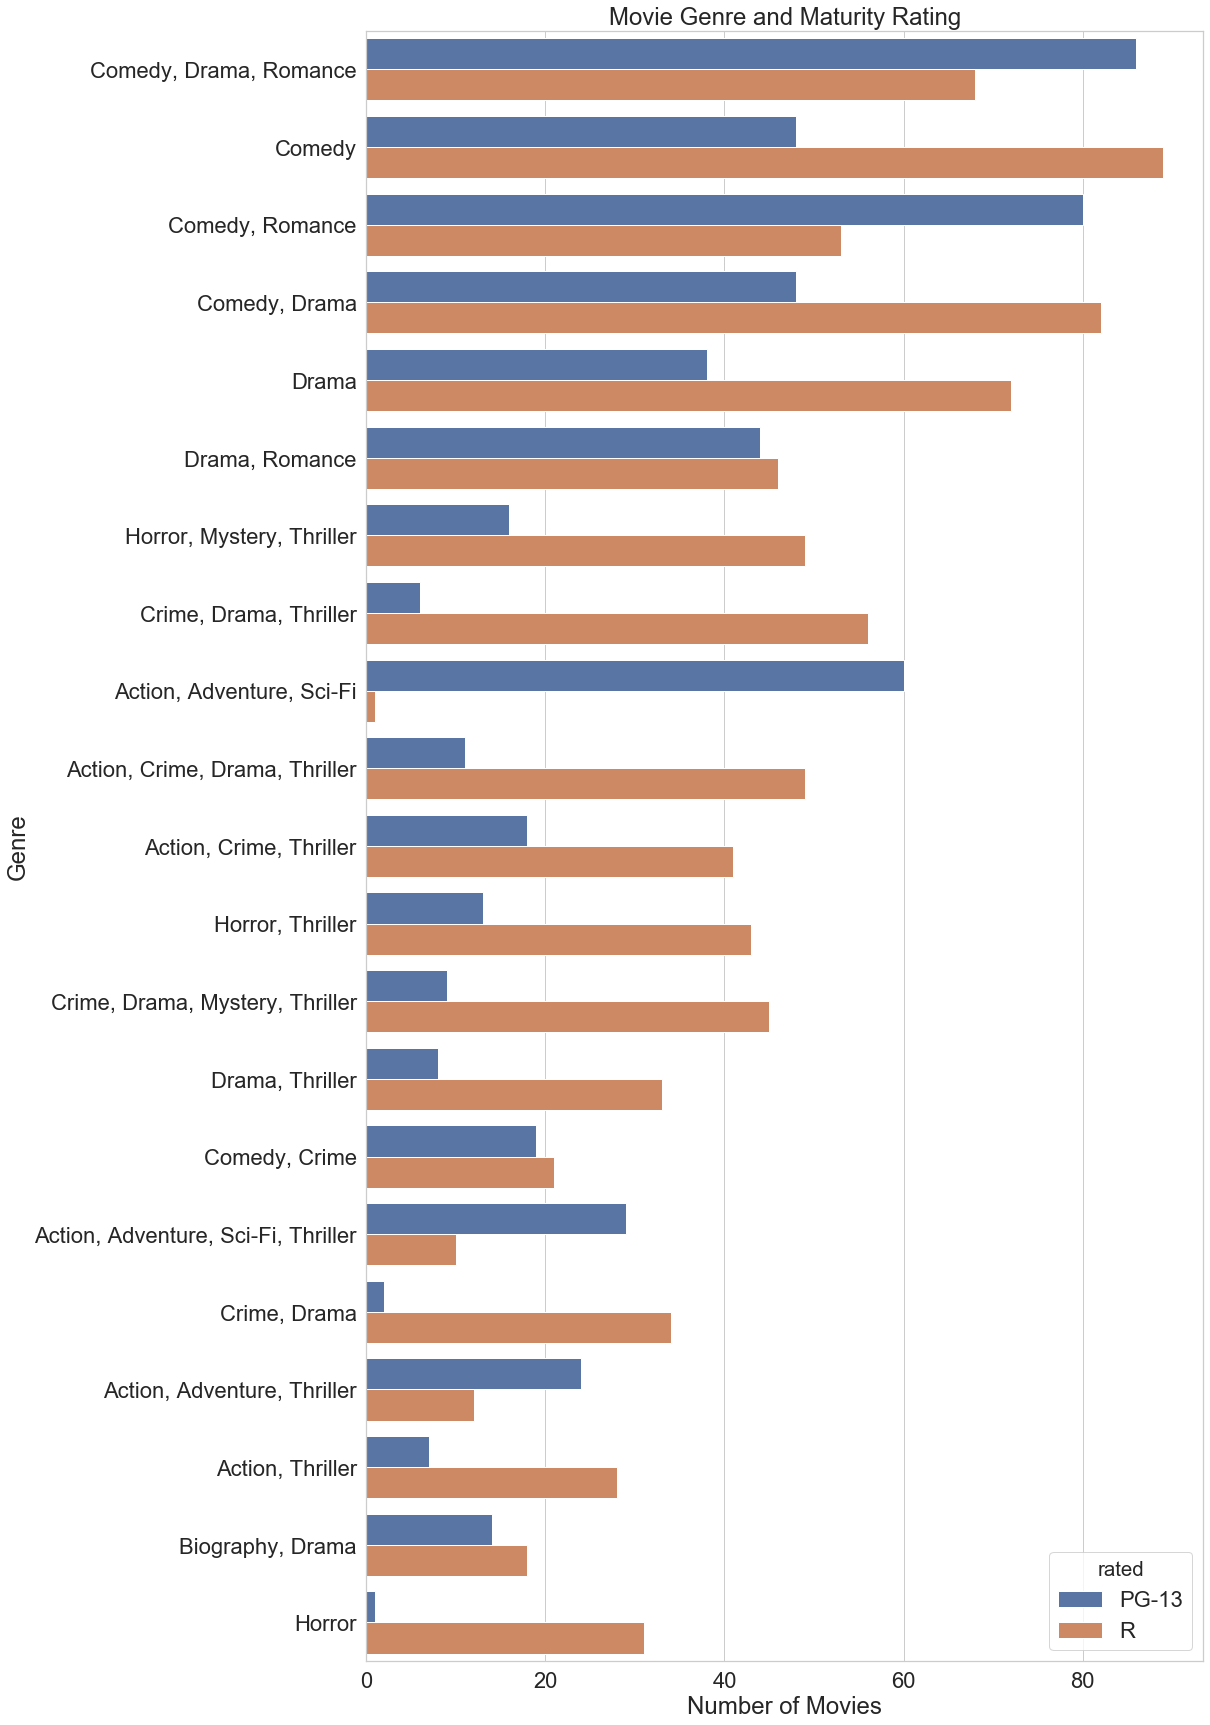

In [199]:
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize = (15,30))
ax = sns.countplot(y='genre', data=dfRated, order=ratGenre40, hue='rated', hue_order=['PG-13', 'R']) #order= organizes your data by a given list
ax.set_title('Movie Genre and Maturity Rating')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.show()

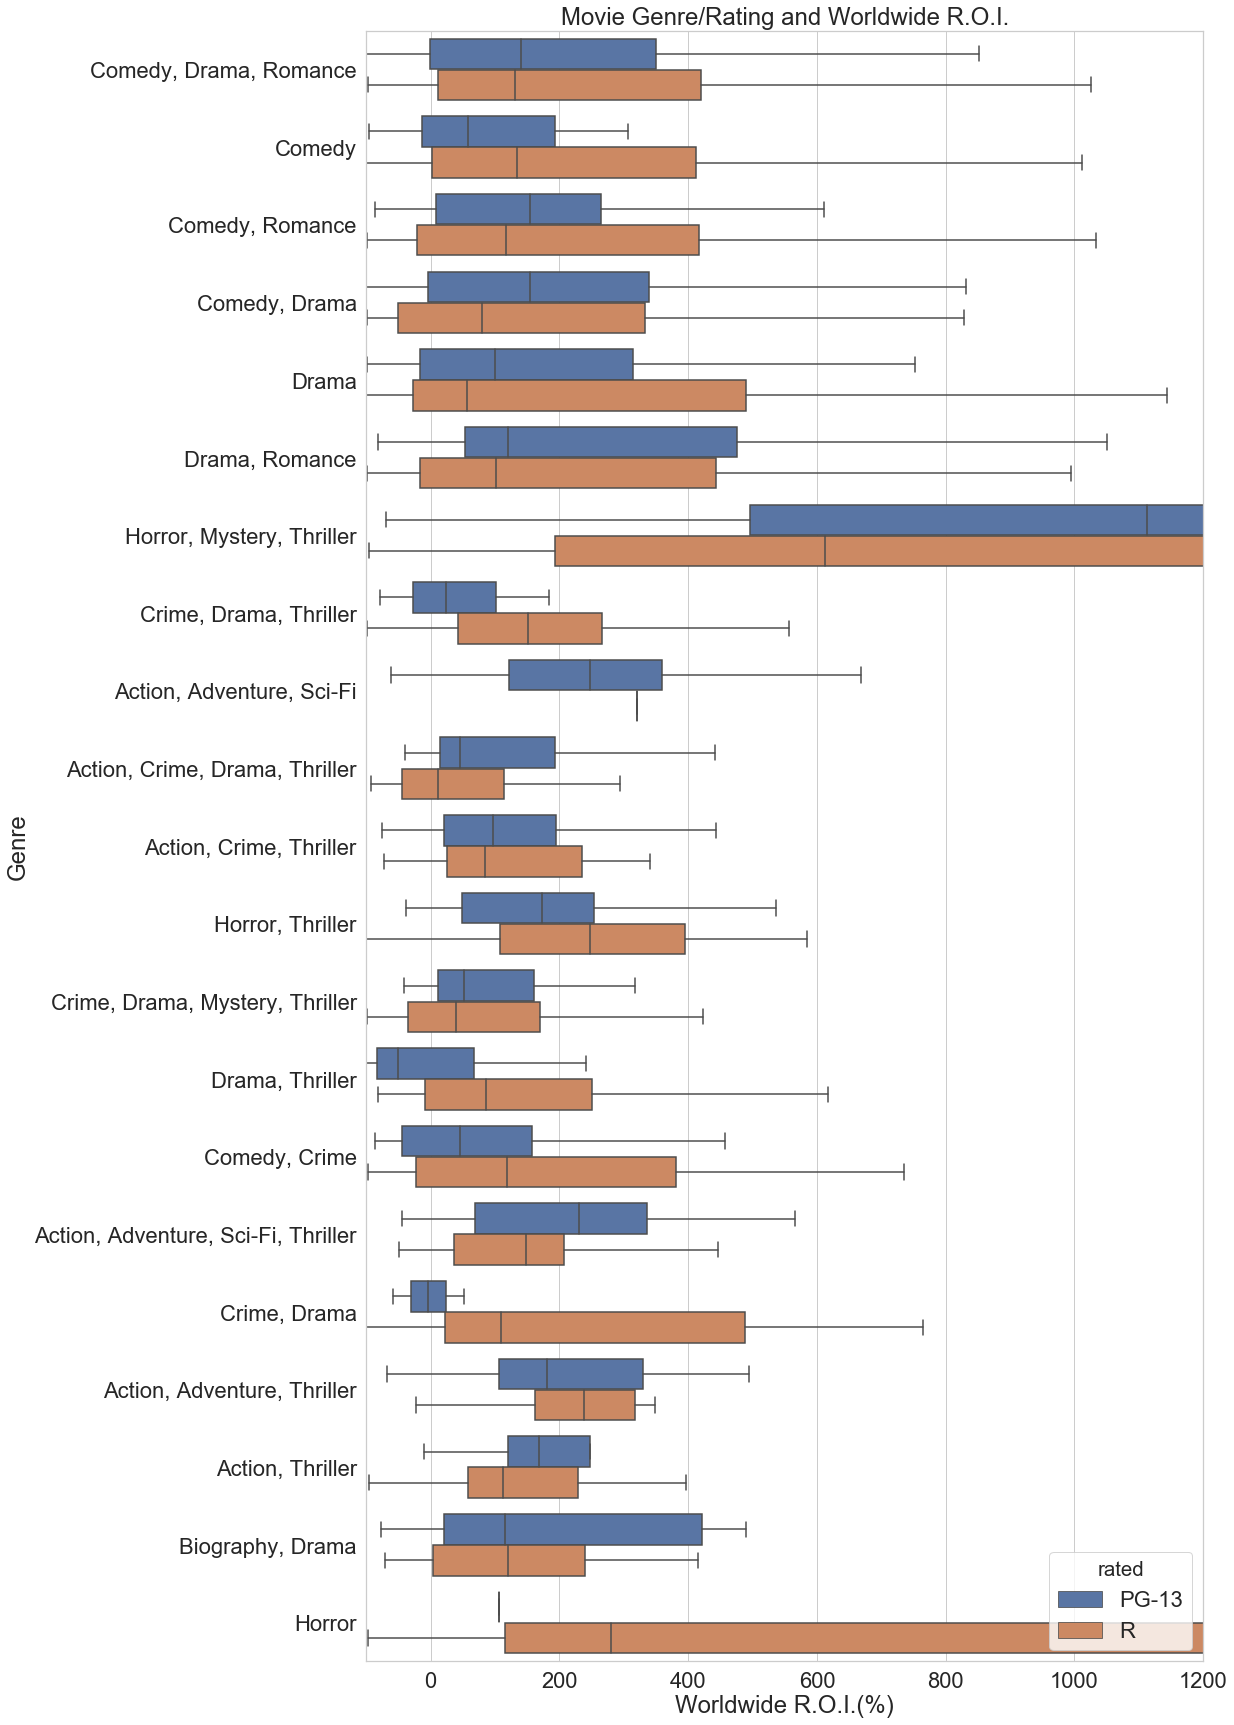

In [202]:
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize = (15,30))
ax = sns.boxplot(y='genre', x='Worldwide R.O.I.(%)', data=dfRated, order=ratGenre40, hue='rated', hue_order=['PG-13', 'R']
                 , fliersize=10, showfliers=False) #order= organizes your data by a given list
ax.set_title('Movie Genre/Rating and Worldwide R.O.I.')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Worldwide R.O.I.(%)')
plt.ylabel('Genre')
ax.set_xlim(-100, 1200)
plt.show()

From the two above plots, we can recommend a PG-13 or R movie with Horror or Action/Adventure